In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Groupby on DataFrames

In [2]:
dframe = DataFrame({'k1': list('XXYYZ'),
                   'k2':['alpha','beta','alpha','beta','alpha'],
                  'dataset1': np.random.randn(5),
                   'dataset2': np.random.randn(5)})
dframe

,k1,k2,dataset1,dataset2
0,X,alpha,0.465778,0.299567
1,X,beta,-0.620552,0.958911
2,Y,alpha,0.149042,-0.792846
3,Y,beta,-0.053631,0.677078
4,Z,alpha,-0.958288,1.729170


In [3]:
group1 = dframe['dataset1'].groupby(dframe['k1'])
group1

In [4]:
group1.mean()

k1
X   -0.077387
Y    0.047706
Z   -0.958288
Name: dataset1, dtype: float64

In [5]:
cities = np.array(['NY','LA','LA',"NY",'NY'])
month= np.array(['JAN','FEB','JAN','FEB','JAN'])

In [6]:
dframe['dataset1'].groupby([cities, month]).mean()

LA  FEB   -0.620552
    JAN    0.149042
NY  FEB   -0.053631
    JAN   -0.246255
Name: dataset1, dtype: float64

In [7]:
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.077387,0.629239
Y,0.047706,-0.057884
Z,-0.958288,1.729170


In [8]:
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.465778  0.299567
   beta  -0.620552  0.958911
Y  alpha  0.149042 -0.792846
   beta  -0.053631  0.677078
Z  alpha -0.958288  1.729170

In [9]:
dframe.groupby('k1').size()

k1
X    2
Y    2
Z    1
dtype: int64

In [10]:
for name, group in dframe.groupby('k1'):
    print("this is the %s group" %name)
    print(group)
    print('\n')

this is the X group
  k1     k2  dataset1  dataset2
0  X  alpha  0.465778  0.299567
1  X   beta -0.620552  0.958911


this is the Y group
  k1     k2  dataset1  dataset2
2  Y  alpha  0.149042 -0.792846
3  Y   beta -0.053631  0.677078


this is the Z group
  k1     k2  dataset1  dataset2
4  Z  alpha -0.958288   1.72917




In [11]:
for (k1,k2), group in dframe.groupby(['k1','k2']):
    print("Key1 = %s Key2 = %s" %(k1,k2))
    print(group)
    print("\n")

Key1 = X Key2 = alpha
  k1     k2  dataset1  dataset2
0  X  alpha  0.465778  0.299567


Key1 = X Key2 = beta
  k1    k2  dataset1  dataset2
1  X  beta -0.620552  0.958911


Key1 = Y Key2 = alpha
  k1     k2  dataset1  dataset2
2  Y  alpha  0.149042 -0.792846


Key1 = Y Key2 = beta
  k1    k2  dataset1  dataset2
3  Y  beta -0.053631  0.677078


Key1 = Z Key2 = alpha
  k1     k2  dataset1  dataset2
4  Z  alpha -0.958288   1.72917




In [12]:
group_dict = dict(list(dframe.groupby('k1')))

In [13]:
group_dict['X']

,k1,k2,dataset1,dataset2
0,X,alpha,0.465778,0.299567
1,X,beta,-0.620552,0.958911


In [14]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes, axis = 1)))

In [15]:
# Separate data by datatypes
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.465778  0.299567
 1 -0.620552  0.958911
 2  0.149042 -0.792846
 3 -0.053631  0.677078
 4 -0.958288  1.729170,
 dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [16]:
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha  0.299567
   beta   0.958911
Y  alpha -0.792846
   beta   0.677078
Z  alpha  1.729170

#### Groupby on Dict and Series

In [17]:
animals = DataFrame(np.arange(16).reshape(4,4),
                   columns = list('WXYZ'),
                   index = ['dog','cat','bird','mouse'])

In [18]:
animals

,W,X,Y,Z
dog,0,1,2,3
cat,4,5,6,7
bird,8,9,10,11
mouse,12,13,14,15


In [19]:
animals.loc[1:2,['W','Y']] = np.nan

In [20]:
animals

,W,X,Y,Z
dog,0.0,1,2.0,3
cat,NaN,5,NaN,7
bird,8.0,9,10.0,11
mouse,12.0,13,14.0,15


In [21]:
behavior_map ={'W':'good','X':'bad','Y':'good','Z':'bad'}

In [22]:
animal_col = animals.groupby(behavior_map, axis = 1)
animal_col.sum()

,bad,good
dog,4.0,2.0
cat,12.0,0.0
bird,20.0,18.0
mouse,28.0,26.0


In [23]:
behav_series = Series(behavior_map)
behav_series
                     

W    good
X     bad
Y    good
Z     bad
dtype: object

In [24]:
animals.groupby(behav_series, axis = 1).count()

,bad,good
dog,2,2
cat,2,0
bird,2,2
mouse,2,2


In [25]:
animals.groupby(len).sum()

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [26]:
keys = ['A','B','A','B']

In [27]:
animals.groupby([len,keys]).max()

W   X     Y   Z
3 A   0.0   1   2.0   3
  B   NaN   5   NaN   7
4 A   8.0   9  10.0  11
5 B  12.0  13  14.0  15

In [28]:
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],names = ['City','sub_value'])


In [29]:
dframe_hr = DataFrame(np.arange(25).reshape(5,5), columns = hier_col)

In [30]:
dframe_hr = dframe_hr * 100

In [31]:
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

#### Aggregation

In [32]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [33]:
dframe_wine = pd.read_csv('winequality-red.csv', sep =';')

In [34]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [36]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [37]:
wino = dframe_wine.groupby('quality')

In [38]:
wino.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [39]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [40]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [41]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [42]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [43]:
dframe_wine.pivot_table(index =['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

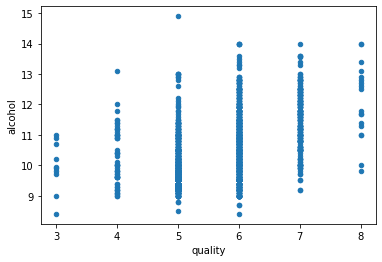

In [44]:
dframe_wine.plot(kind ='scatter', x = 'quality', y ='alcohol')

#### Split, Apply, Combine

In [45]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) +1
    return df

In [46]:
dframe_wine.sort_values('alcohol', ascending = False, inplace = True)

In [47]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [48]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571,3


In [49]:
num_of_qual = dframe_wine['quality'].value_counts()

In [50]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [51]:
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


#### Cross Tabulation

In [52]:
# Special case of pivot table
from io import StringIO

In [53]:
data = """\
Sample Animal Intelligence
1 Dog Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart
"""

In [54]:
dframe = pd.read_table(StringIO(data), sep = '\s+')

In [55]:
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [56]:
pd.crosstab(dframe.Animal, dframe.Intelligence, margins = True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6


### Data Visualization

#### Histograms

In [57]:
dataset1 = randn(100)

''

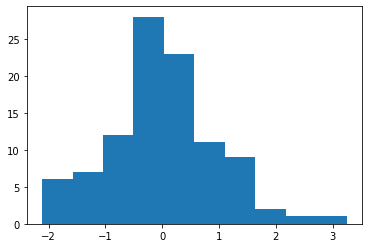

In [58]:
plt.hist(dataset1)
;

''

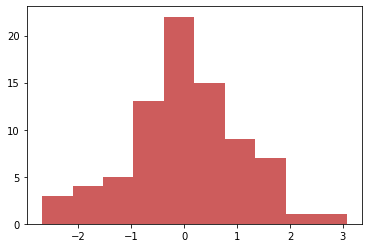

In [59]:
dataset2 = randn(80)
plt.hist(dataset2, color = 'indianred')
;

''

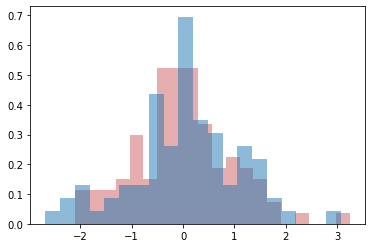

In [60]:
plt.hist(dataset1, density = True, color ='indianred', alpha = 0.5, bins =20)
plt.hist(dataset2, density = True, alpha = 0.5, bins =20)
;

In [61]:
data1 = randn(1000)
data2 = randn(1000)

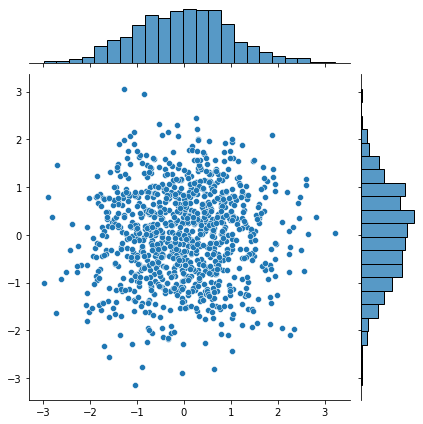

In [62]:
sns.jointplot(data1, data2)

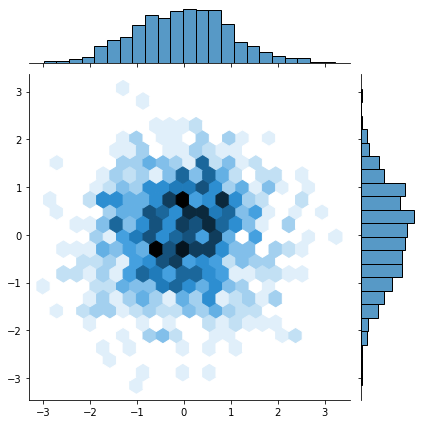

In [63]:
sns.jointplot(data1, data2, kind = 'hex')

#### Kernel Density Estimate Plots

In [64]:
# KDE Plots to estimate PDF

dataset = randn(25)


<AxesSubplot:>

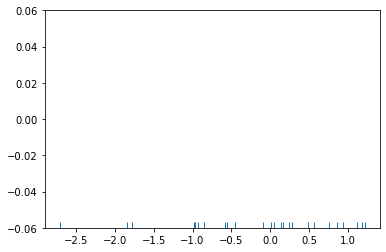

In [65]:
sns.rugplot(dataset)

<AxesSubplot:>

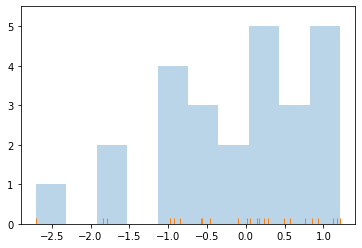

In [66]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0.0, 1.0)

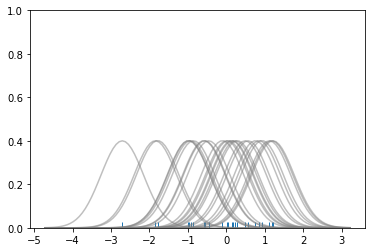

In [67]:
sns.rugplot(dataset)
x_min =dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

# Bandwidth

bandwidth = ((4*dataset.std()**5) / (3 * len(dataset))) ** 0.2
kernel_list = []
for data_point in dataset:
    # Create a kernel for each point and append it to the kernel list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

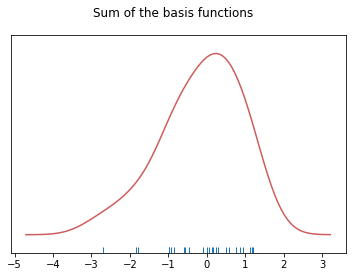

In [68]:
sum_of_kde = np.sum(kernel_list, axis = 0)
fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

<AxesSubplot:ylabel='Density'>

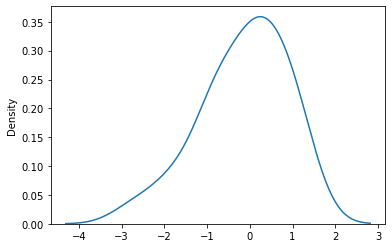

In [69]:
sns.kdeplot(dataset)

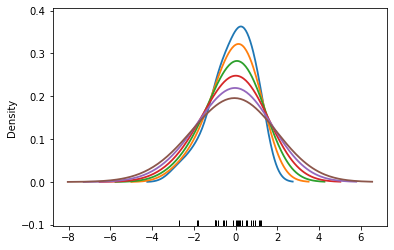

In [70]:


sns.rugplot(dataset, color ='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw = bw, lw = 1.8, label = bw)

In [71]:
!pip3 install statsmodels

In [72]:
import statsmodels

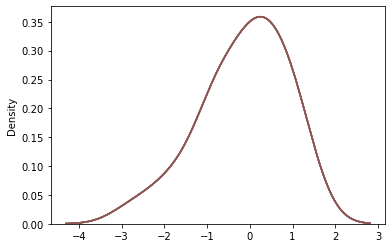

In [73]:

kernel_options = ['biw', 'cos', 'epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern , label = kern)

    # Support for non-gaussian kernels have been removed

<AxesSubplot:ylabel='Density'>

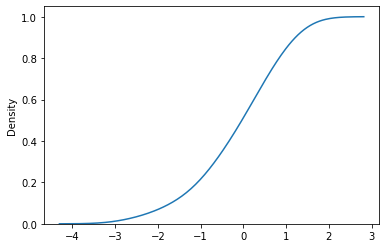

In [74]:
sns.kdeplot(dataset, cumulative = True)

<AxesSubplot:>

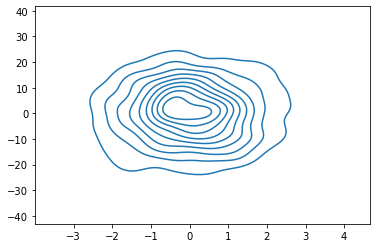

In [75]:
mean = [0,0]

cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = DataFrame(dataset2, columns = ['X','Y'])
x = dframe['X'].array
y = dframe['Y'].array
sns.kdeplot(x= x, y=y)

<AxesSubplot:xlabel='X', ylabel='Y'>

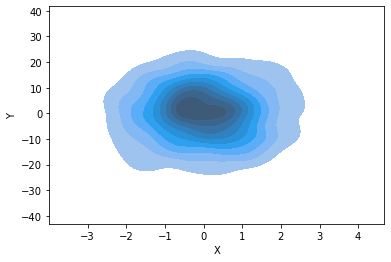

In [76]:
sns.kdeplot(dframe.X, dframe.Y, shade = True)

<AxesSubplot:xlabel='X', ylabel='Y'>

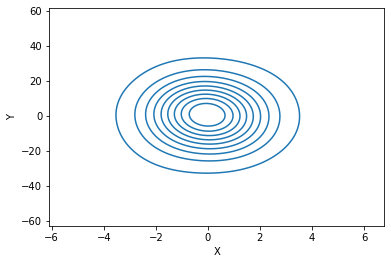

In [77]:
sns.kdeplot(dframe.X, dframe.Y, bw = 1)

<AxesSubplot:xlabel='X', ylabel='Y'>

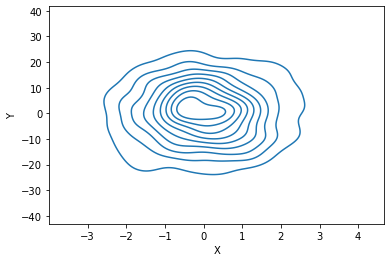

In [78]:
sns.kdeplot(dframe.X, dframe.Y, bw = 'silverman')

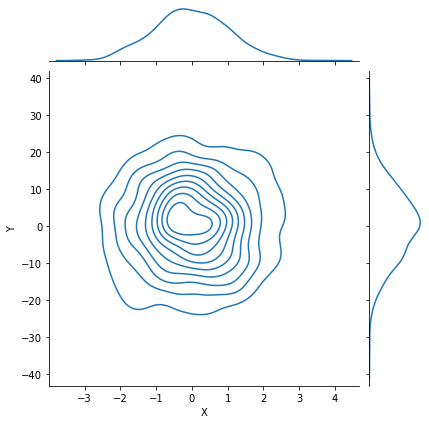

In [79]:
sns.jointplot('X','Y', dframe, kind = 'kde' )

#### Combining Plot Styles

In [80]:
dataset = randn(100)

<AxesSubplot:ylabel='Density'>

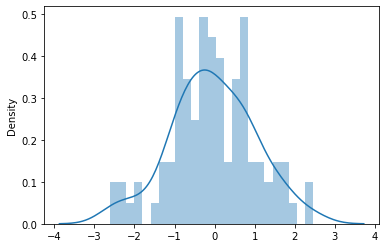

In [81]:
sns.distplot(dataset, bins = 25)

<AxesSubplot:ylabel='Density'>

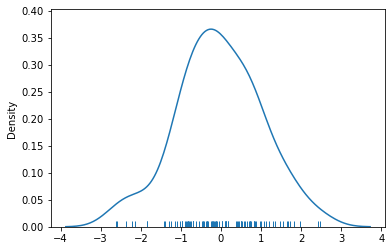

In [82]:
sns.distplot(dataset, bins = 25, rug = True, hist = False)

<AxesSubplot:ylabel='Density'>

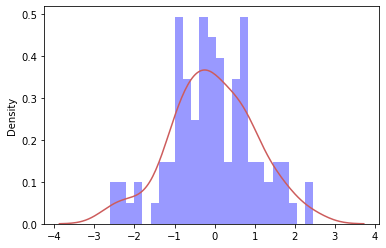

In [83]:
sns.distplot(dataset, bins = 25,
            kde_kws = {'color': 'indianred', 'label':'KDE PLOT'},
            hist_kws = {'color':'blue', 'label':'HIST'})

In [84]:
ser1 = Series(dataset, name = "My_data")
ser1

0    -0.697533
1     1.539755
2     0.506858
3     0.717628
4     0.026497
        ...   
95   -0.323659
96   -0.960979
97   -0.775577
98    0.822290
99    1.674224
Name: My_data, Length: 100, dtype: float64

<AxesSubplot:xlabel='My_data', ylabel='Density'>

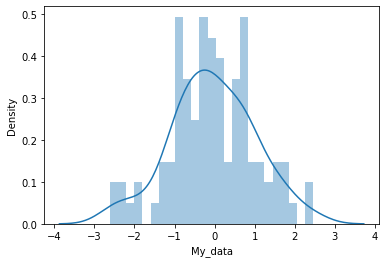

In [85]:
sns.distplot(ser1, bins = 25)

#### Box and Violin Plots

In [86]:
data1 = randn(100)
data2 = randn(100)

<AxesSubplot:>

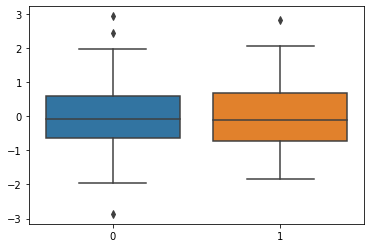

In [87]:
sns.boxplot(data = [data1,data2])

<AxesSubplot:>

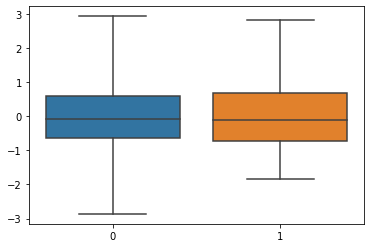

In [88]:
sns.boxplot(data = [data1, data2], whis = np.inf)

<AxesSubplot:>

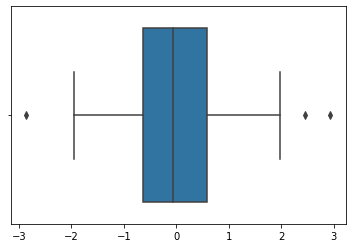

In [89]:
sns.boxplot(data1, orient = 'h')

<AxesSubplot:>

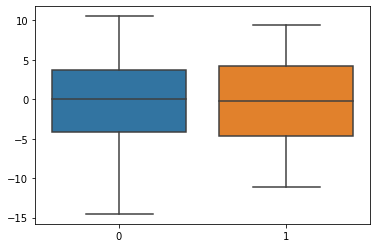

In [90]:
# Normal Distribution
data1 = stats.norm(0,5).rvs(100)

# Two gamma distribution. concatenated together
data2 = np.concatenate([stats.gamma(5).rvs(50)-1, 
                        -1*stats.gamma(5).rvs(50)])
# Box plot of data1, data2
sns.boxplot(data = [data1, data2])

<AxesSubplot:>

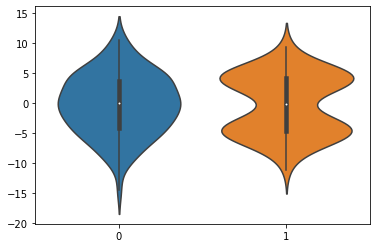

In [91]:
sns.violinplot(data=[data1, data2])

<AxesSubplot:>

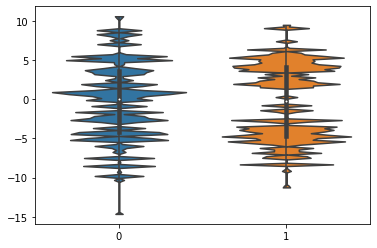

In [92]:
sns.violinplot(data =[data1, data2], bw = 0.01)

<AxesSubplot:>

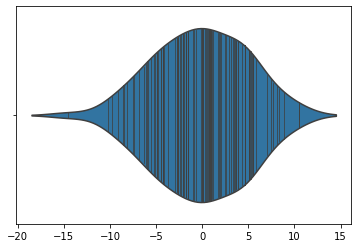

In [93]:
sns.violinplot(data1, inner = 'stick')

#### Regression plots

In [94]:
tips = sns.load_dataset('tips')

In [95]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


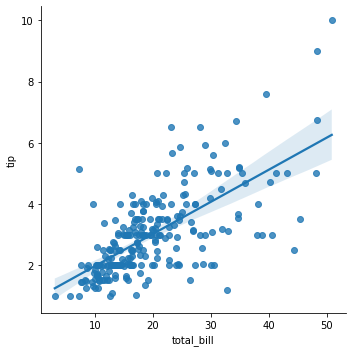

In [96]:
sns.lmplot('total_bill','tip', tips)

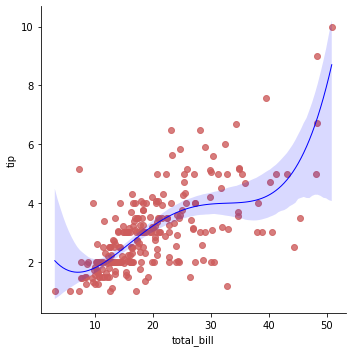

In [97]:
sns.lmplot('total_bill','tip', tips,order = 4,
          scatter_kws = {'marker':'o', 'color':'indianred'},
          line_kws = {'linewidth': 1, 'color': 'blue'})

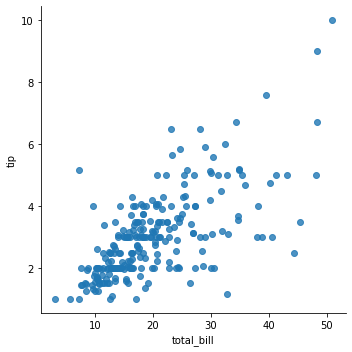

In [98]:
sns.lmplot('total_bill','tip', tips, fit_reg = False)

In [99]:
tips['tip_pect'] = 100* (tips['tip']/ tips['total_bill'])

In [100]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


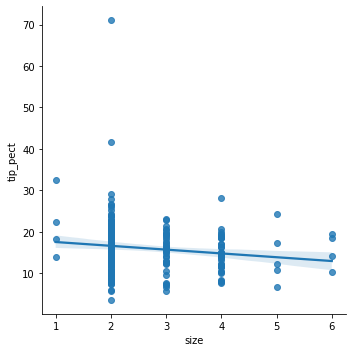

In [101]:
sns.lmplot('size', 'tip_pect', tips)

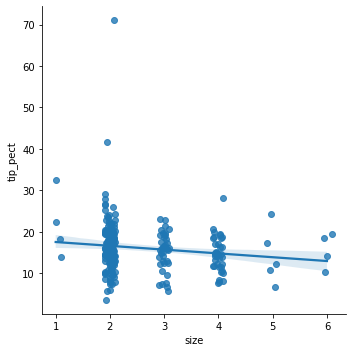

In [102]:
sns.lmplot('size','tip_pect', tips, x_jitter = .1)

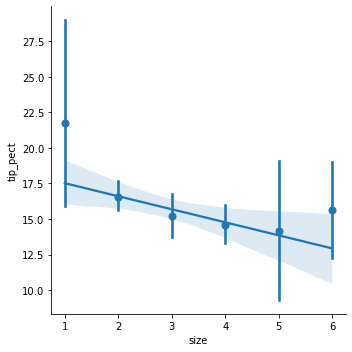

In [103]:
sns.lmplot('size', 'tip_pect', tips, x_estimator = np.mean)

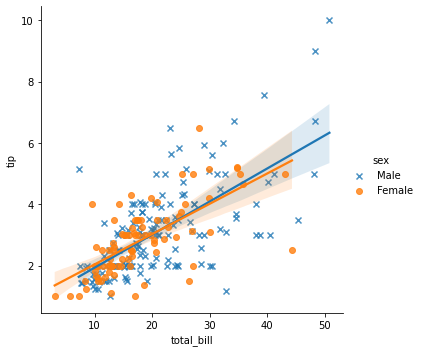

In [104]:
sns.lmplot('total_bill','tip', tips, hue = 'sex', markers =['x','o'])

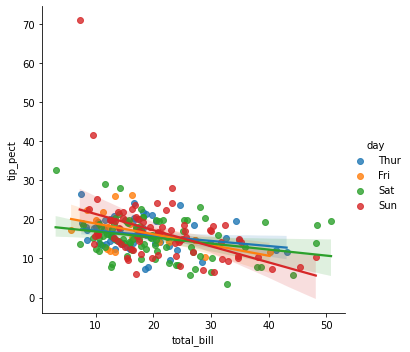

In [105]:
sns.lmplot('total_bill', 'tip_pect', tips, hue = 'day')

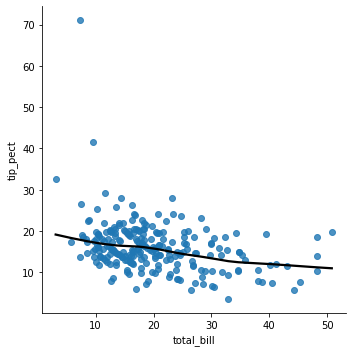

In [106]:
# Local regression
sns.lmplot('total_bill', 'tip_pect', tips, lowess = True, line_kws = {'color':'black'})

<AxesSubplot:xlabel='total_bill', ylabel='tip_pect'>

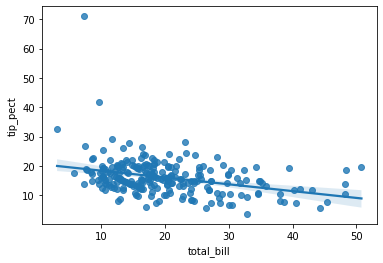

In [107]:
sns.regplot('total_bill', 'tip_pect', tips)

<AxesSubplot:xlabel='size', ylabel='tip_pect'>

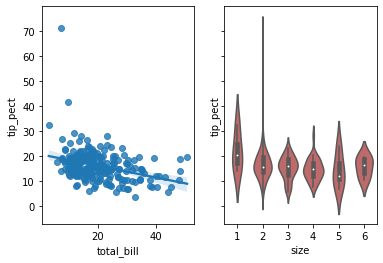

In [108]:
fig, (axis1, axis2) = plt.subplots(1,2,sharey = True)
sns.regplot("total_bill",'tip_pect', tips, ax = axis1)
sns.violinplot(x = tips['size'], y = tips['tip_pect'], color= 'indianred', ax = axis2)

#### Heatmaps and Clustered Matrices

In [109]:
flight_dframe = sns.load_dataset('flights')

In [110]:
flight_dframe.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [111]:
flight_dframe =flight_dframe.pivot('month', 'year', 'passengers') 

In [112]:
flight_dframe.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

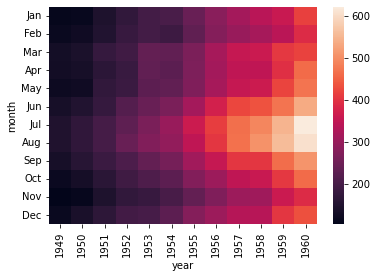

In [113]:
sns.heatmap(flight_dframe)

<AxesSubplot:xlabel='year', ylabel='month'>

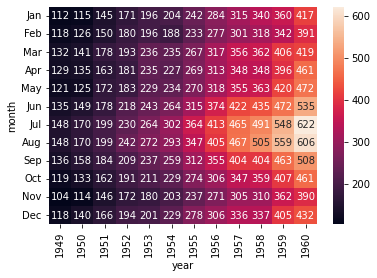

In [114]:
sns.heatmap(flight_dframe, annot = True, fmt ='d')

<AxesSubplot:xlabel='year', ylabel='month'>

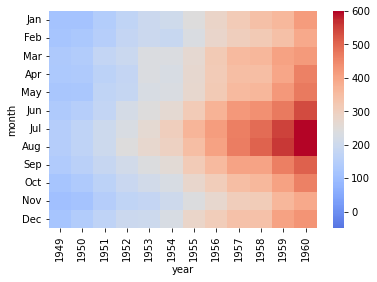

In [115]:
sns.heatmap(flight_dframe, center = flight_dframe.loc['Jan', 1955],vmin = -50, vmax = 600, cmap = 'coolwarm')

<AxesSubplot:xlabel='year', ylabel='month'>

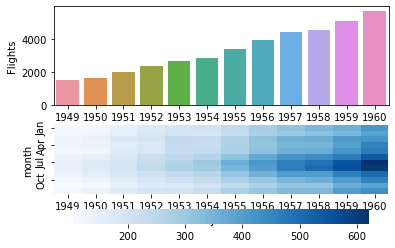

In [116]:
fig,(axis1, axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = Series(yearly_flights.index.values)
years = DataFrame(years)
flights = Series(yearly_flights.values)
flights = DataFrame(flights)

year_dframe = pd.concat((years, flights), axis = 1)
year_dframe.columns = ['Years', 'Flights']

sns.barplot(x = "Years", y = 'Flights', data = year_dframe, ax = axis1)

sns.heatmap(flight_dframe, cmap = 'Blues', ax = axis2, cbar_kws = {'orientation':'horizontal'})

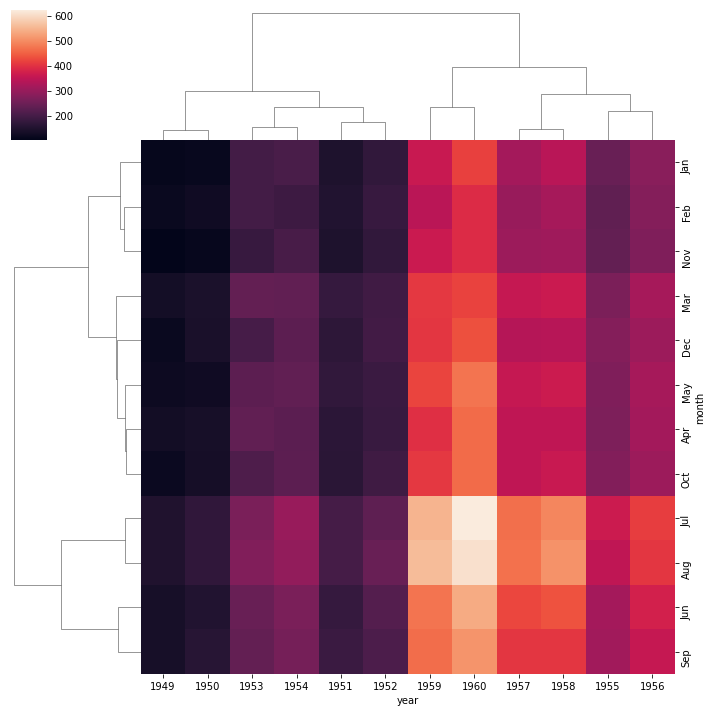

In [117]:
# Cluster map

sns.clustermap(flight_dframe)

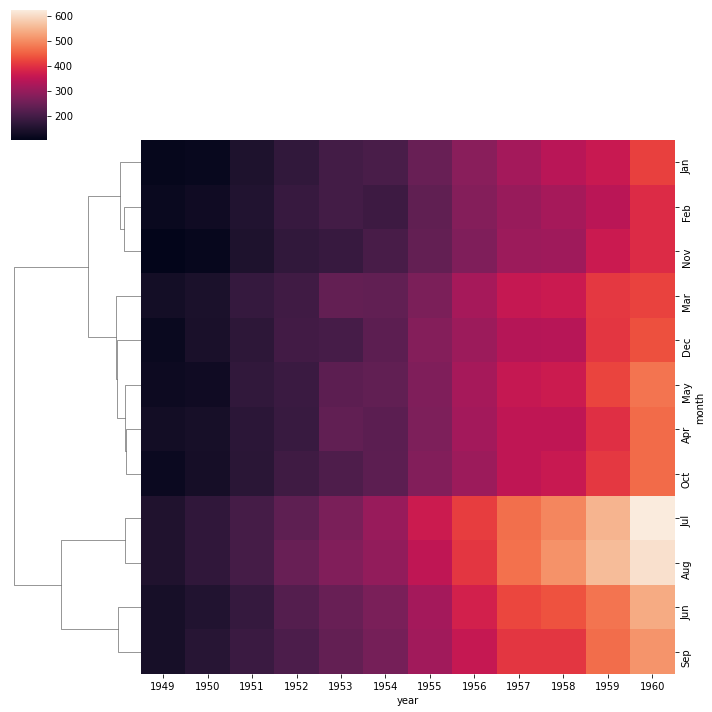

In [118]:
sns.clustermap(flight_dframe, col_cluster = False)

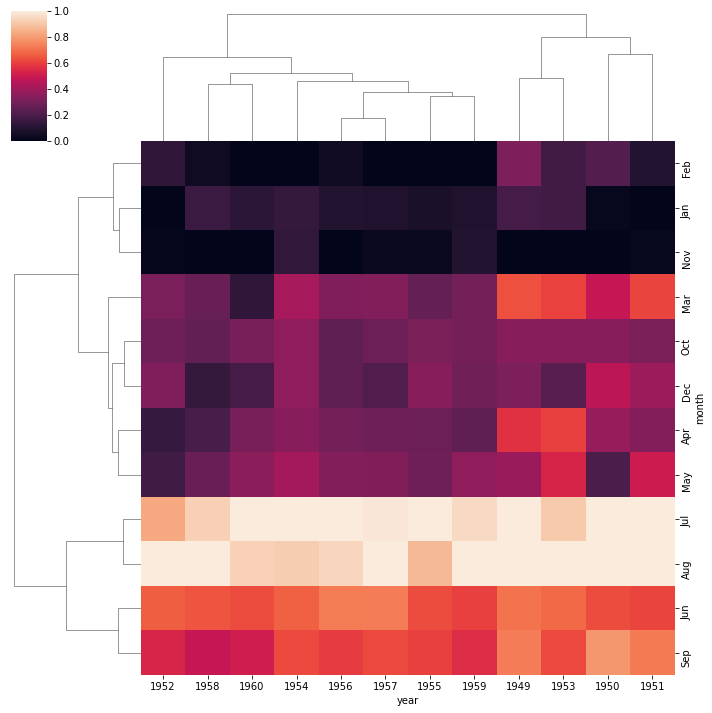

In [119]:
sns.clustermap(flight_dframe, standard_scale = 1)

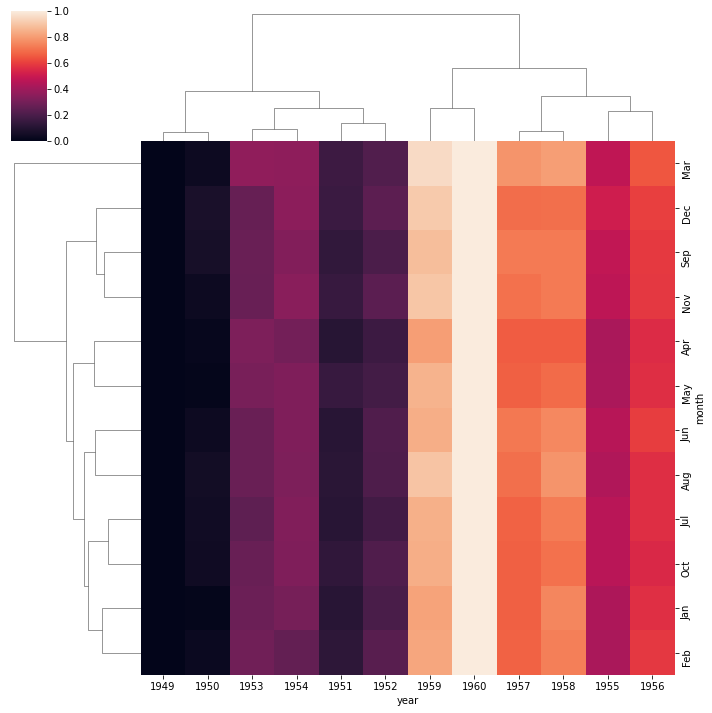

In [120]:
sns.clustermap(flight_dframe, standard_scale = 0)

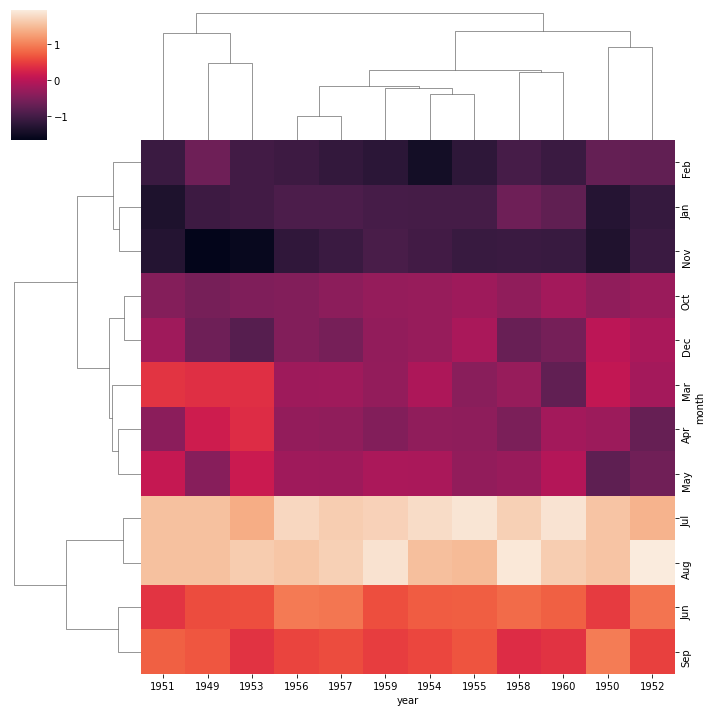

In [121]:
sns.clustermap(flight_dframe, z_score = 1)